# GEE getThumbUrl example

In [1]:
# Import the Earth Engine Python Package
import ee # !pip install earthengine-api

# Import Dependencies
import pandas as pd
import matplotlib.dates as mdates
from IPython.display import Image
from datetime import datetime
from matplotlib import dates
from pylab import *

ee.Initialize()

# Initialization using polgyon

In [2]:
# set variables
SCALE = 10;
polarization = 'VV'; # vertical/vertical or vertical/horizontal

In [3]:
# build geometry to measure
rect = ee.Geometry.Polygon(
        [[[106.81591544702997, -6.33681462466857],
          [106.81591544702997, -6.350036929099756],
          [106.82780299738397, -6.350036929099756],
          [106.82780299738397, -6.33681462466857]]])

In [4]:
# convert geometry to JSON format
rect_JSON = rect.getInfo()['coordinates']

## run gee analysis trough api

In [5]:
# initiate google earth engine to aquire the image
S1 = ee.ImageCollection('COPERNICUS/S1_GRD')\
.filterDate('2016-01-01', '2019-12-12')\
.filter(ee.Filter.listContains('transmitterReceiverPolarisation', polarization))\
.filter(ee.Filter.eq('instrumentMode', 'IW'))\
.filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))\
.select(polarization)\
.filterBounds(rect);

## plotting the result

In [53]:
# visualize resulting image
img_url = S1.first().getThumbUrl({
    'region':rect_JSON,
    'min':-25,
    'max':0,
    'palette':['0784b5', '39ace7', '9bd4e4', 'cadeef', 'ffffff']
})

Image(url = img_url)

In [54]:
import imageio

# download image as np array
im = imageio.imread(url)

In [55]:
# apply value mask
array_mask = np.array(im < 170).astype(int)

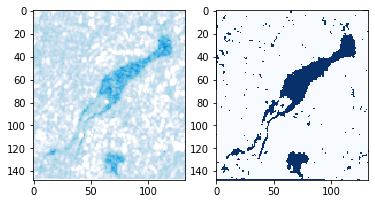

In [56]:
# plot results
plt.subplot(121)
plt.imshow(im, cmap = 'Blues')
plt.subplot(122)
plt.imshow(array_mask[:,:,0], cmap = 'Blues')

In [57]:
from gbdxtools import Interface
gbdx = Interface()

is_del = gbdx.catalog.get_data_location("104001001BA7C400")
print(is_del)

s3://receiving-dgcs-tdgplatform-com/011227076010_01_003


In [5]:
#Download a single file from a GBDX S3 location

from gbdxtools import Interface
gbdx = Interface()

#Path to file on GBDX S3 location
#location is relative to user's GBDX S3 location, ie s3://gbd-customer-data/<prefix>/
location = "011227076010_01_003"

#Path to local directory for download
local_dir = "local_dir_name"

gbdx.s3.download(location=location, local_dir=local_dir)

ValueError: Download target gbd-customer-data/cda287c5-137e-4235-8c61-4c456e5e77e0/011227076010_01_003 was not found or inaccessible.